In [1]:
import uproot
import awkward as ak
import numpy as np
import hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
from collections import defaultdict
import matplotlib.ticker as mtick
import cycler


In [2]:
with uproot.open("/grid_mnt/data__data.polcms/cms/cuisset/cmt/MergePrePlot/bul_2018_ZZ_v12/GluGluToXToZZTo2B2Tau_M1000/cat_base_selection/prod_250315_btag_tests/data__HPS_nobtag.root:LHE_HT/LHE_HT")as hr:
    h = hr.to_hist()

In [3]:
def load_histo(process, btag_mode, feature):
    if btag_mode == "reshape":
        removeWeightsTag = "" # TODO update when there is extrap factor
    elif btag_mode == "noWeight":
        removeWeightsTag = "__removeWeights_bTagweightReshape" # TODO
    else: raise ValueError(btag_mode)
    with uproot.open(f"/grid_mnt/data__data.polcms/cms/cuisset/cmt/MergePrePlot/bul_2018_ZZ_v12/{process}/cat_base_selection/prod_250315_btag_tests/data__HPS_nobtag{removeWeightsTag}.root:{feature}/{feature}") as hr:
        return hr.to_hist()

In [5]:
# possible features : nJet,LHE_HT,LHE_HT_low,LHE_HT_high,jet_btag_count_total,jet_btagcand_count
feature_label = {"nJet": "Number of AK4 jets"}
btag_mode_label = {"reshape" : "With b-tag reshaping weight", "noWeight" : "No b-tag reweighting"}

In [8]:
def plot(process, feature):
    btag_modes = ["reshape", "noWeight"]
    hs = {btag_mode : load_histo(process, btag_mode, feature) for btag_mode in btag_modes}

    plt.figure()
    # plt.title(region)
    # plt.rc('axes', prop_cycle=cycler.cycler(color= [plt.get_cmap('tab20')(i) for i in range(20)]))
    hep.histplot(list(hs.values()), label=[btag_mode_label.get(k, k) for k in hs.keys()], yerr=False)
    plt.xlabel(feature_label.get(feature, feature))
    plt.ylabel("Events")
    #hep.histplot(hs[process_signal]["central"]*10, histtype="step", yerr=True, label="signal")
    plt.legend()
    # plt.yscale("log")
    # plt.ylim(bottom=1)


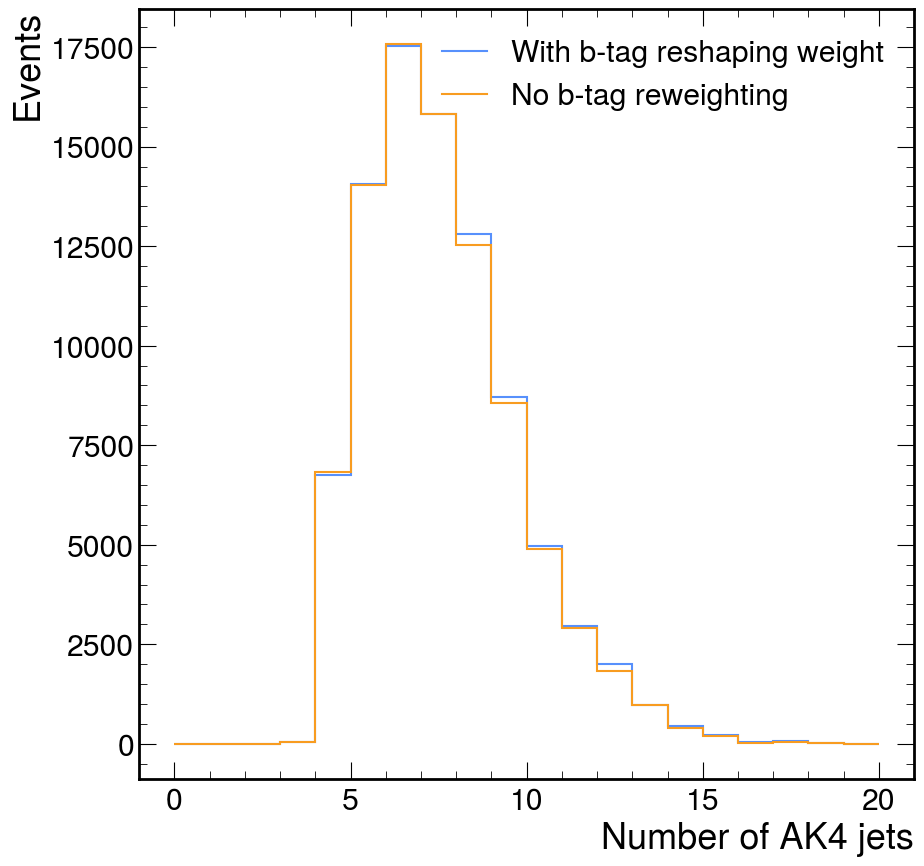

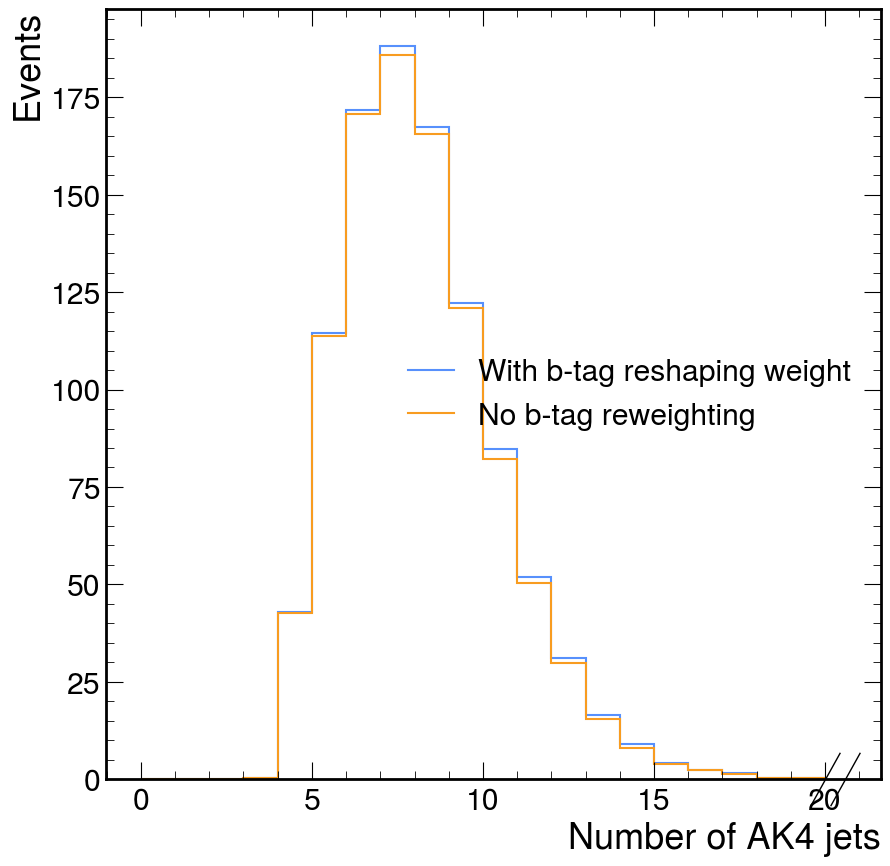

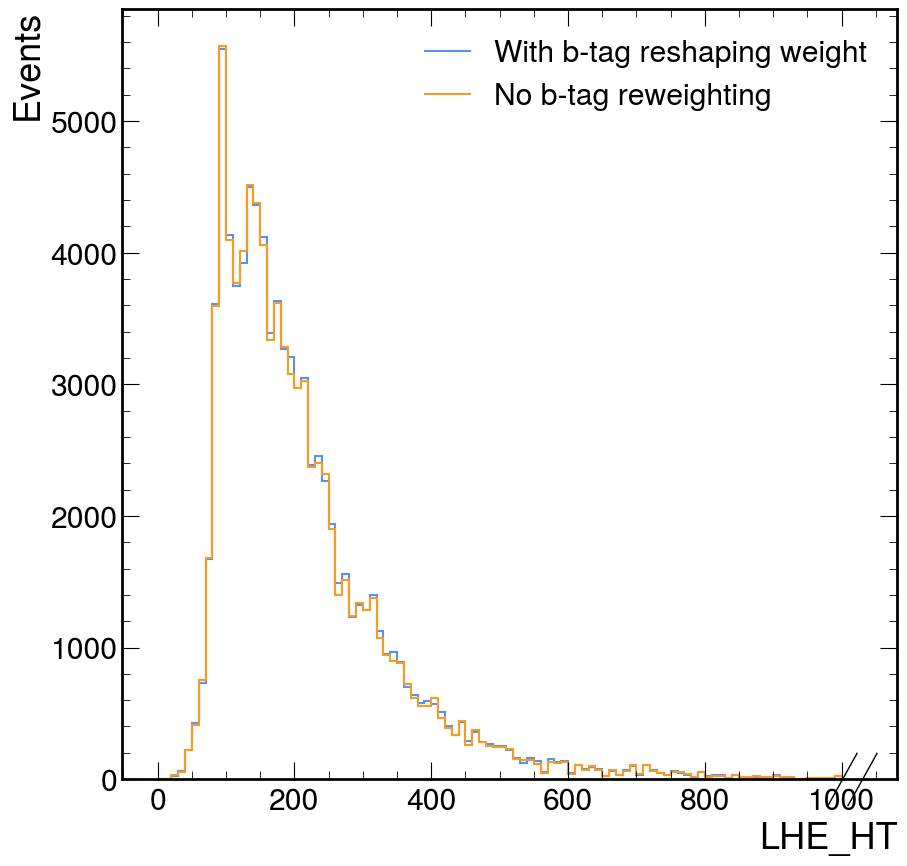

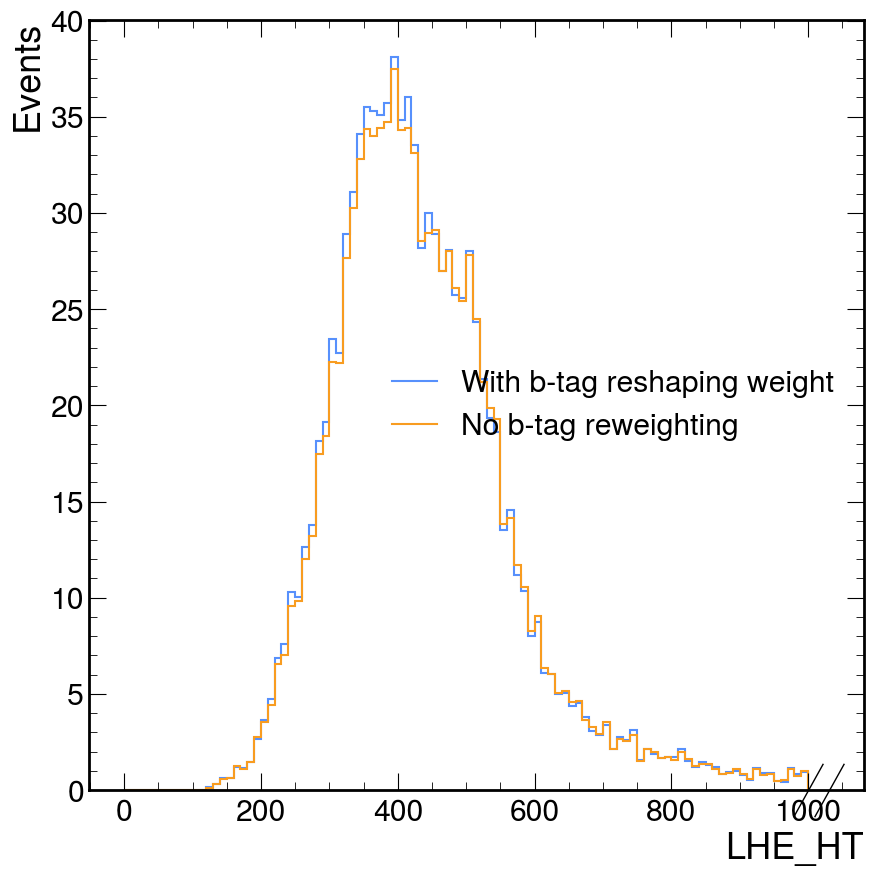

In [10]:
for feature in ["nJet", "LHE_HT"]:
    plot(process = "zz_sl_signal", feature=feature)
    plot(process="GluGluToXToZZTo2B2Tau_M1000", feature=feature)